In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

In [2]:
output_dir = 'outputs_12_topk_molecules'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [3]:
## generated by ReBADD-SE
filepath_rebadd = os.path.join('outputs_7_calculate_properties_generated', 'frag+reinforce+scst+offpolicy', 'smi_after.csv.0')
df_rebadd = pd.read_csv(filepath_rebadd).loc[:,('smiles', 'bcl2', 'bclxl', 'bclw', 'sa', 'ra')].drop_duplicates()
df_rebadd.loc[:,'TP'] = df_rebadd.loc[:,'bcl2'] * df_rebadd.loc[:,'bclxl'] * df_rebadd.loc[:,'bclw'] * (10 - df_rebadd.loc[:,'sa']) * df_rebadd.loc[:,'ra'] * 1e-4

In [4]:
## generated by RationaleRL
filepath_rationale = os.path.join('baseline', 'RationaleRL', 'smi_after.csv.0')
df_rationale = pd.read_csv(filepath_rationale).loc[:,('smiles', 'bcl2', 'bclxl', 'bclw', 'sa', 'ra')].drop_duplicates()
df_rationale.loc[:,'TP'] = df_rationale.loc[:,'bcl2'] * df_rationale.loc[:,'bclxl'] * df_rationale.loc[:,'bclw'] * (10 - df_rationale.loc[:,'sa']) * df_rationale.loc[:,'ra'] * 1e-4

In [5]:
## generated by MARS
filepath_mars = os.path.join('baseline', 'MARS', 'smi_after.csv.0')
df_mars = pd.read_csv(filepath_mars).loc[:,('smiles', 'bcl2', 'bclxl', 'bclw', 'sa', 'ra')].drop_duplicates()
df_mars.loc[:,'TP'] = df_mars.loc[:,'bcl2'] * df_mars.loc[:,'bclxl'] * df_mars.loc[:,'bclw'] * (10 - df_mars.loc[:,'sa']) * df_mars.loc[:,'ra'] * 1e-4

In [6]:
## generated by ReLeaSE
filepath_release = os.path.join('baseline', 'ReLeaSE', 'smi_after.csv.0')
df_release = pd.read_csv(filepath_release).loc[:,('smiles', 'bcl2', 'bclxl', 'bclw', 'sa', 'ra')].drop_duplicates()
df_release.loc[:,'TP'] = df_release.loc[:,'bcl2'] * df_release.loc[:,'bclxl'] * df_release.loc[:,'bclw'] * (10 - df_release.loc[:,'sa']) * df_release.loc[:,'ra'] * 1e-4

In [7]:
## generated by MolGPT
filepath_molgpt = os.path.join('baseline', 'MolGPT', 'smi_after.csv.0')
df_molgpt = pd.read_csv(filepath_molgpt).loc[:,('smiles', 'bcl2', 'bclxl', 'bclw', 'sa', 'ra')].drop_duplicates()
df_molgpt.loc[:,'TP'] = df_molgpt.loc[:,'bcl2'] * df_molgpt.loc[:,'bclxl'] * df_molgpt.loc[:,'bclw'] * (10 - df_molgpt.loc[:,'sa']) * df_molgpt.loc[:,'ra'] * 1e-4

In [8]:
df_rebadd = df_rebadd.nlargest(3, 'TP').reset_index(drop=True)
df_rebadd.loc[:,'label'] = 'ReBADD-SE'

df_rationale = df_rationale.nlargest(3, 'TP').reset_index(drop=True)
df_rationale.loc[:,'label'] = 'RationaleRL'

df_mars = df_mars.nlargest(3, 'TP').reset_index(drop=True)
df_mars.loc[:,'label'] = 'MARS'

df_release = df_release.nlargest(3, 'TP').reset_index(drop=True)
df_release.loc[:,'label'] = 'ReLeaSE'

df_molgpt = df_molgpt.nlargest(3, 'TP').reset_index(drop=True)
df_molgpt.loc[:,'label'] = 'MolGPT'

df_merged = pd.concat((df_rebadd, df_rationale, df_mars, df_release, df_molgpt))

In [9]:
df_merged

,smiles,bcl2,bclxl,bclw,sa,ra,TP,label
0,O=C(NC(=S)Nc1ccc2oc(C=C3c4c(Br)ccc(Br)c43)nc2c...,9.166670,9.117249,8.441625,3.063010,0.961961,0.470793,ReBADD-SE
1,O=C(NC(=S)Nc1ccc2oc(C=Cc3c(Br)ccc(Br)c3F)nc2c1...,9.017086,8.758691,8.307263,3.063311,0.982091,0.446959,ReBADD-SE
2,O=C(NC(=S)Nc1ccc2oc(C=Cc3c(Br)ccc(Br)c3C=CCCl)...,9.180454,8.807920,8.277489,3.309654,0.985534,0.441323,ReBADD-SE
0,CCC(c1ccccc1)c1ccc2c(c1)N(C)c1cccc(S(=O)(=O)N(...,10.169559,9.654593,7.960662,3.968030,0.953693,0.449627,RationaleRL
1,CCC(c1ccccc1)c1ccc2c(c1)N(C)c1cccc(S(=O)(=O)N(...,10.273105,9.899285,8.833288,4.426687,0.877518,0.439336,RationaleRL
2,CCC(c1ccc(N(C)C)cc1)c1ccc2c(c1)N(C)c1c(cccc1S(...,10.116603,9.437730,7.682379,4.190470,0.941926,0.401380,RationaleRL
0,O=C(NC(=S)Nc1ncc(-c2ccc(Nc3nccs3)c(-c3ccon3)c2...,9.307978,8.964203,8.194984,3.117791,0.956114,0.449938,MARS
1,[C-]#[N+]c1cc(N)cc(CNC(=O)c2cn[nH]c2Oc2ccc(Nc3...,8.944683,9.079895,8.335871,3.663891,0.966768,0.414707,MARS
2,[C-]#[N+]c1cc(Oc2ccccc2-c2cncn2C)ccc1Nc1cnc(S)...,9.037253,8.904863,7.860065,3.352912,0.973795,0.409439,MARS
0,CNC(=O)COC(=O)C(C)N(c1cc(Cl)ccc1Cl)C(=O)CN(c1c...,9.520178,8.619105,7.910143,3.238547,0.981145,0.430591,ReLeaSE


In [10]:
df_merged.to_csv(os.path.join(output_dir, 'top3_molecules.csv'), index=False)

In [11]:
df_rebadd

,smiles,bcl2,bclxl,bclw,sa,ra,TP,label
0,O=C(NC(=S)Nc1ccc2oc(C=C3c4c(Br)ccc(Br)c43)nc2c...,9.166670,9.117249,8.441625,3.063010,0.961961,0.470793,ReBADD-SE
1,O=C(NC(=S)Nc1ccc2oc(C=Cc3c(Br)ccc(Br)c3F)nc2c1...,9.017086,8.758691,8.307263,3.063311,0.982091,0.446959,ReBADD-SE
2,O=C(NC(=S)Nc1ccc2oc(C=Cc3c(Br)ccc(Br)c3C=CCCl)...,9.180454,8.807920,8.277489,3.309654,0.985534,0.441323,ReBADD-SE


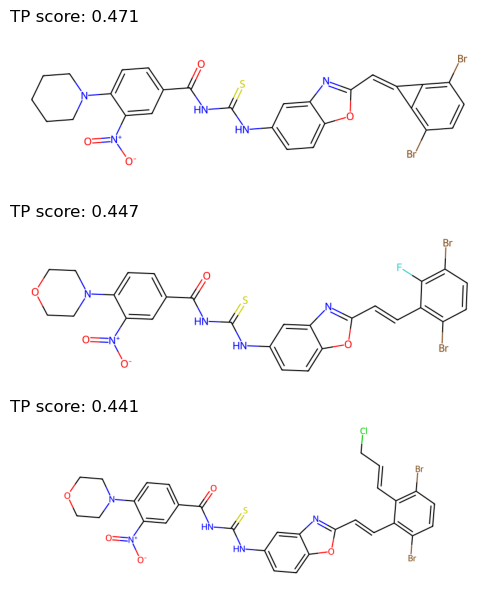

In [13]:
fig, ax = plt.subplots(3,1,figsize=(6,6))

for i, smi in enumerate(df_rebadd.loc[:,'smiles'].values):
    mol = Chem.MolFromSmiles(smi)
    ax[i].imshow(Chem.Draw.MolToImage(mol, size=(900,300)))
    ax[i].axis('off')
    ax[i].set_title(f"TP score: {df_rebadd.loc[i,'TP']:.3f}", loc='left')
    
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'best_three_molecules_ReBADD-SE.pdf'))